Same problem with Different approach

Approch : Transfer Learning

* **Resnet**
* **VGG16**
* **VGG19**
* **Imagnet**
* **Inception Model**

In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os
os.listdir("../input/plantdisease/plantvillage/PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [3]:
EPOCHS = 5
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((128,128))
image_size = 0
directory_root = '../input/plantdisease/plantvillage'
width=128
height=128
depth=3

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error --- : {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Image loading completed


In [5]:
image_size = len(image_list)
image_size

2952

In [6]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


# **Normalization Of images**

In [7]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


# **Augmentation Of data**

In [8]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

# 5 Layer CNN Algorithm 

In [9]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 42, 42, 64)       

# **Optimizer**

In [10]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [11]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 13s 182ms/step - loss: 0.2226 - accuracy: 0.9304 - val_loss: 1.4544 - val_accuracy: 0.8759
Epoch 2/5
73/73 [==============================] - 8s 109ms/step - loss: 0.1750 - accuracy: 0.9417 - val_loss: 1.4598 - val_accuracy: 0.8759
Epoch 3/5
73/73 [==============================] - 8s 112ms/step - loss: 0.1325 - accuracy: 0.9525 - val_loss: 0.7267 - val_accuracy: 0.8998
Epoch 4/5
73/73 [==============================] - 8s 111ms/step - loss: 0.1204 - accuracy: 0.9570 - val_loss: 0.8378 - val_accuracy: 0.8858
Epoch 5/5
73/73 [==============================] - 9s 117ms/step - loss: 0.1098 - accuracy: 0.9601 - val_loss: 0.7179 - val_accuracy: 0.8825


# **Results and Plots**

In [12]:
def Res_Plot_Test_Save(name):
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    
    #print("[INFO] Saving model")
    #model.save(name)
    

[INFO] Plotting model accuracy and Loss


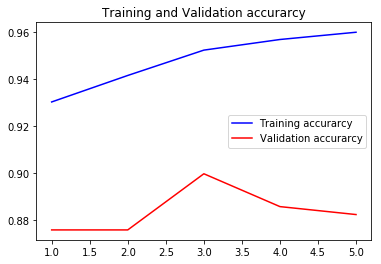

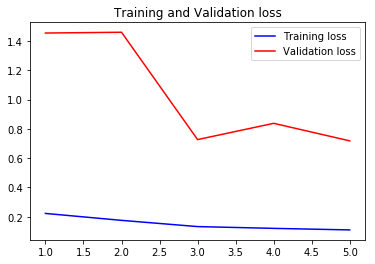

[INFO] Calculating model accuracy
591/591 [==============================] - 0s 531us/step
Test Accuracy: 88.24591040611267


In [13]:
Res_Plot_Test_Save('penta_CNN_Algorithm.h5')

# Transfer Learning Implementation

### Transfer Learning Advantages
Typically transfer learning enables us to build more robust models which can perform a wide variety of tasks.
* Helps solve complex real-world problems with several constraints
* Tackle problems like having little or almost no labeled data availability
* Ease of transfering knowledge from one model to another based on domains and tasks
* Provides a path towards achieving Artificial General Intelligence some day in the future!

### **Inception ModelV3**

In [14]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(128, 128, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 63, 63, 32)   96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 63, 63, 32)   0           batch_normalization_7[0][0]      
___________________________

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 15s 199ms/step - loss: 0.2254 - accuracy: 0.9338 - val_loss: 0.3395 - val_accuracy: 0.9092
Epoch 2/5
73/73 [==============================] - 9s 123ms/step - loss: 0.1821 - accuracy: 0.9398 - val_loss: 0.2519 - val_accuracy: 0.9283
Epoch 3/5
73/73 [==============================] - 9s 123ms/step - loss: 0.1657 - accuracy: 0.9419 - val_loss: 0.2812 - val_accuracy: 0.9197
Epoch 4/5
73/73 [==============================] - 8s 115ms/step - loss: 0.1567 - accuracy: 0.9437 - val_loss: 0.3509 - val_accuracy: 0.9190
Epoch 5/5
73/73 [==============================] - 9s 121ms/step - loss: 0.1515 - accuracy: 0.9469 - val_loss: 0.3213 - val_accuracy: 0.9213


[INFO] Plotting model accuracy and Loss


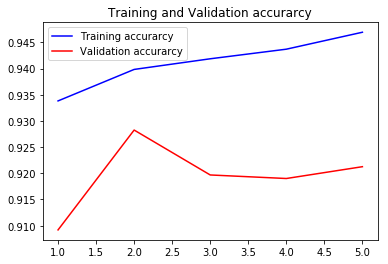

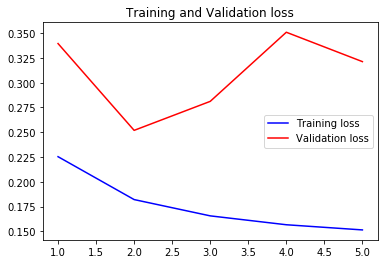

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 1ms/step
Test Accuracy: 92.12633967399597


In [16]:
Res_Plot_Test_Save('Inception_ModelV3_(Imagenet_Weights).h5')

### **Resnet Model**

##### Weights : Imagenet

In [17]:
from keras.models import Model
from keras import applications
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [18]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 38s 516ms/step - loss: 0.3105 - accuracy: 0.9290 - val_loss: 1.9308 - val_accuracy: 0.8741
Epoch 2/5
73/73 [==============================] - 13s 180ms/step - loss: 0.2299 - accuracy: 0.9333 - val_loss: 0.2799 - val_accuracy: 0.9208
Epoch 3/5
73/73 [==============================] - 13s 179ms/step - loss: 0.1819 - accuracy: 0.9385 - val_loss: 0.2190 - val_accuracy: 0.9319
Epoch 4/5
73/73 [==============================] - 14s 188ms/step - loss: 0.1565 - accuracy: 0.9436 - val_loss: 0.2300 - val_accuracy: 0.9287
Epoch 5/5
73/73 [==============================] - 13s 182ms/step - loss: 0.1397 - accuracy: 0.9500 - val_loss: 0.2526 - val_accuracy: 0.9279


[INFO] Plotting model accuracy and Loss


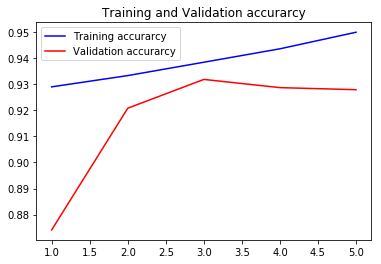

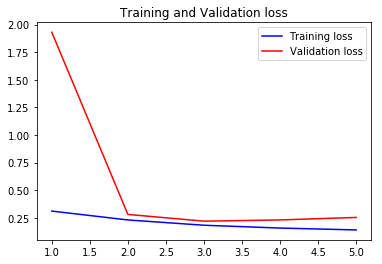

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 92.79188513755798


In [19]:
Res_Plot_Test_Save('Resnet_With_Imagenet_Weingts.h5')

### **VGG16 Model**

##### Weights : Imagenet

In [20]:
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
vgg = vgg16.VGG16(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [21]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 38s 515ms/step - loss: 0.2247 - accuracy: 0.9377 - val_loss: 1.9143 - val_accuracy: 0.8741
Epoch 2/5
73/73 [==============================] - 14s 187ms/step - loss: 0.1623 - accuracy: 0.9449 - val_loss: 1.8014 - val_accuracy: 0.8756
Epoch 3/5
73/73 [==============================] - 14s 185ms/step - loss: 0.1321 - accuracy: 0.9518 - val_loss: 0.3119 - val_accuracy: 0.9179
Epoch 4/5
73/73 [==============================] - 13s 184ms/step - loss: 0.1229 - accuracy: 0.9544 - val_loss: 0.3680 - val_accuracy: 0.9190
Epoch 5/5
73/73 [==============================] - 13s 183ms/step - loss: 0.1099 - accuracy: 0.9596 - val_loss: 0.2659 - val_accuracy: 0.9231


[INFO] Plotting model accuracy and Loss


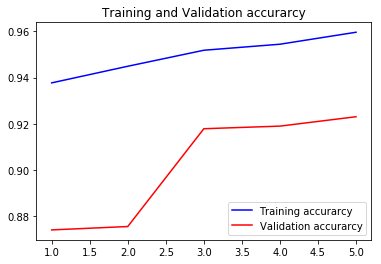

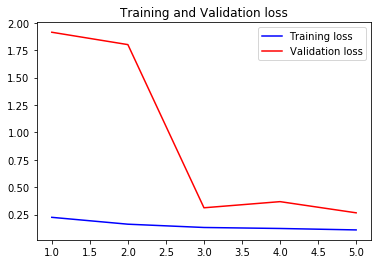

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 92.30682253837585


In [22]:
Res_Plot_Test_Save('VGG16_With_Imagenet_Weingts.h5')

### **VGG19 Model**

##### Weights : Imagenet

In [23]:
from keras.models import Model
from keras.applications import vgg19
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
vgg = vgg19.VGG19(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [24]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=15, verbose=1
    )

Epoch 1/15
73/73 [==============================] - 38s 517ms/step - loss: 0.1524 - accuracy: 0.9496 - val_loss: 1.2174 - val_accuracy: 0.8775
Epoch 2/15
73/73 [==============================] - 13s 180ms/step - loss: 0.1253 - accuracy: 0.9542 - val_loss: 0.5278 - val_accuracy: 0.9158
Epoch 3/15
73/73 [==============================] - 14s 187ms/step - loss: 0.1099 - accuracy: 0.9600 - val_loss: 0.3967 - val_accuracy: 0.9134
Epoch 4/15
73/73 [==============================] - 13s 182ms/step - loss: 0.1053 - accuracy: 0.9599 - val_loss: 0.3108 - val_accuracy: 0.9116
Epoch 5/15
73/73 [==============================] - 14s 185ms/step - loss: 0.0999 - accuracy: 0.9622 - val_loss: 0.2449 - val_accuracy: 0.9314
Epoch 6/15
73/73 [==============================] - 13s 179ms/step - loss: 0.0967 - accuracy: 0.9644 - val_loss: 0.3398 - val_accuracy: 0.9200
Epoch 7/15
73/73 [==============================] - 13s 180ms/step - loss: 0.0869 - accuracy: 0.9666 - val_loss: 0.2375 - val_accuracy: 0.9402

[INFO] Plotting model accuracy and Loss


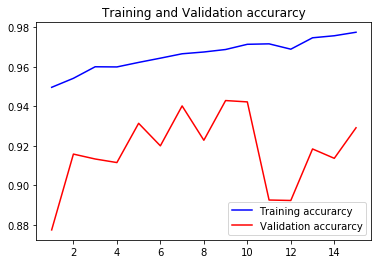

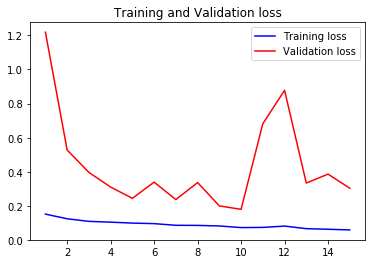

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 92.91596412658691


In [25]:
Res_Plot_Test_Save('VGG19_Imagenet.h5')